In [239]:
using OffsetArrays, Statistics
include("../code/bp_full.jl")
include("../code/slim_graphs.jl")

findbasis_slow (generic function with 1 method)

In [240]:
m = factorial(5)*11
R = 0.8/3
r = 1 - 3R
n = round(Int, 3m/(2+r))
Λ = OffsetVector([0,0,1-r,r], 0:3)
K = OffsetVector([0,0,0,1], 0:3)
nedges = 3m
H = 0.63
s = rand((-1,1), n)
efield = [(exp(ss*H),exp(-ss*H)) for ss in s]
bp = bp_full(n, m, nedges, Λ, K, efield)
B, freevars = findbasis_slow(Array(bp.H))

(Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 1 0; 0 0 … 0 1], [120, 824, 864, 1004, 1018, 1032, 1081, 1091, 1105, 1109  …  1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800])

In [ ]:
nunsat, ovl, dist = decimate!(bp, efield, freevars, maxiter=1000, Tmax=1, tol=1e-4, callback=cb_decimation) 

In [241]:
bp.efield[freevars] .= [ss==1 ? (1.0,0.0) : (0.0,1.0) for ss in s[freevars]];

In [242]:
iteration!(bp, tol=0, maxiter=10^4, damp=0.5)

(1.1102230246251565e-16, 10000)

In [243]:
nunsat, ovl, dist = performance(bp,s)

(0, 0.2533333333333333, 0.37333333333333335)

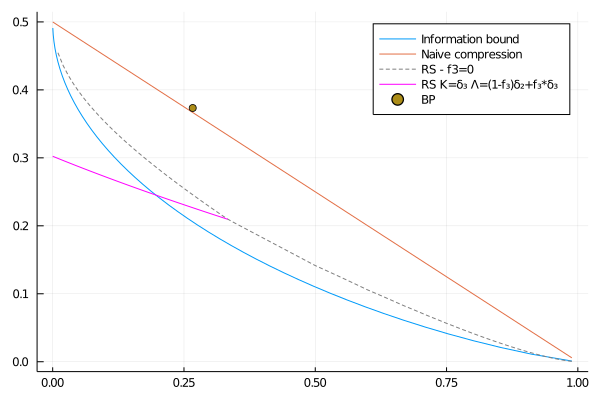

In [244]:
pl = plot_rdb()
scatter!([R], [dist], label="BP")

In [249]:
sum(b[1]>0 && b[2]>0 for b in bp.belief)
bp.belief

1800-element Array{Tuple{Float64,Float64},1}:
 (1.0, 0.0)
 (1.0, 0.0)
 (1.0, 0.0)
 (0.0, 1.0)
 (0.0, 1.0)
 (0.0, 1.0)
 (0.0, 1.0)
 (1.0, 0.0)
 (0.0, 1.0)
 (0.0, 1.0)
 (1.0, 0.0)
 (0.0, 1.0)
 (1.0, 0.0)
 ⋮
 (1.0, 0.0)
 (0.0, 1.0)
 (1.0, 0.0)
 (1.0, 0.0)
 (1.0, 0.0)
 (0.0, 1.0)
 (0.0, 1.0)
 (1.0, 0.0)
 (1.0, 0.0)
 (0.0, 1.0)
 (1.0, 0.0)
 (1.0, 0.0)

In [302]:
m = factorial(5)*11
R = 0.8/3
r = 1 - 3R
n = round(Int, 3m/(2+r))
Λ = OffsetVector([0,0,1-r,r], 0:3)
K = OffsetVector([0,0,0,1], 0:3)
nedges = 3m
H = 0.63
s = rand((-1,1), n)
efield = [(exp(ss*H),exp(-ss*H)) for ss in s]
bp = bp_full(n, m, nedges, Λ, K, efield)
B, freevars = findbasis_slow(Array(bp.H))

(Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 1 0; 0 0 … 0 1], [915, 935, 946, 970, 981, 990, 1007, 1010, 1019, 1078  …  1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800])

In [338]:
Bindep = maximum(sum(B,dims=1)), n

(153, 1800)

In [325]:
cw = falses(n)
dist = 0.3
s = [rand()<dist for _ in 1:n]
mean(s)

0.29555555555555557

In [326]:
efield = fill((0.99,0.01), n)
bp = bp_full(n, m, nedges, Λ, K, efield);

In [327]:
ε,iters = iteration!(bp, maxiter=10^3, tol=0)

(0.0, 1000)

In [328]:
bp.belief;

In [329]:
H = 2
T = ((exp(H),exp(-H)) ./ (2cosh(H)), (exp(-H),exp(H)) ./ (2cosh(H)))
efield = [T[s[i]+1] for i in 1:n];

In [330]:
bp.efield .= efield;

In [331]:
ε,iters = iteration!(bp, maxiter=10^4, tol=0, damp=0.95)

(0.01435650656330395, 10000)

In [332]:
[bp.belief bp.efield]

1800×2 Array{Tuple{Float64,Float64},2}:
 (1.0, 1.56003e-7)        (0.982014, 0.0179862)
 (0.195365, 0.804635)     (0.0179862, 0.982014)
 (0.277773, 0.722227)     (0.0179862, 0.982014)
 (0.397581, 0.602419)     (0.0179862, 0.982014)
 (0.958753, 0.0412468)    (0.982014, 0.0179862)
 (0.999573, 0.000426544)  (0.982014, 0.0179862)
 (0.258885, 0.741115)     (0.0179862, 0.982014)
 (1.0, 1.08962e-7)        (0.982014, 0.0179862)
 (0.00260435, 0.997396)   (0.0179862, 0.982014)
 (0.999872, 0.000128342)  (0.982014, 0.0179862)
 (0.999929, 7.06607e-5)   (0.982014, 0.0179862)
 (0.946567, 0.0534333)    (0.982014, 0.0179862)
 (0.996798, 0.00320156)   (0.982014, 0.0179862)
 ⋮                        
 (0.997003, 0.00299701)   (0.982014, 0.0179862)
 (0.982324, 0.0176763)    (0.982014, 0.0179862)
 (0.997118, 0.00288196)   (0.0179862, 0.982014)
 (0.99995, 5.02613e-5)    (0.982014, 0.0179862)
 (0.999998, 1.65253e-6)   (0.0179862, 0.982014)
 (0.999998, 2.35752e-6)   (0.982014, 0.0179862)
 (0.997003, 0.0029971

In [333]:
sum(argmax(b) .!=1 for b in bp.belief)

556